# Analytical Approach

### Esteban García Muñoz

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Loading the dataset pso_results.csv into a pandas DataFrame and display the first few rows to verify the structure of the data.

In [21]:
dfConc = pd.read_csv('C:/Users/esteb/Desktop/CUNEF/2024-2025/Segundo cuatri/Programación Paralela/Entrega2/Conc/data/pso_results.csv')
dfHilos = pd.read_csv('pso_resultsHilos.csv')

In [18]:
dfConc.describe().T

,count,mean,std,min,25%,50%,75%,max
dimensions,128.0,3.500000,1.505894,2.0,2.000000e+00,3.500000e+00,5.000000,5.000000
swarmsize,128.0,17.500000,7.529470,10.0,1.000000e+01,1.750000e+01,25.000000,25.000000
omega,128.0,0.450000,0.050196,0.4,4.000000e-01,4.500000e-01,0.500000,0.500000
phip,128.0,1.400000,0.401572,1.0,1.000000e+00,1.400000e+00,1.800000,1.800000
phig,128.0,1.400000,0.401572,1.0,1.000000e+00,1.400000e+00,1.800000,1.800000
max_iter,128.0,155.000000,95.373282,60.0,6.000000e+01,1.550000e+02,250.000000,250.000000
best_value,128.0,1.682370,3.400354,0.0,1.760064e-57,4.569105e-16,0.994961,16.997185
total_time(s),128.0,0.064832,0.054895,0.0,2.409476e-02,4.358208e-02,0.091598,0.250059


Generating descriptive statistics for all numerical columns, such as mean, standard deviation, minimum, and maximum values. This provides an overview of the dataset's distribution.

In [22]:
dfHilos.describe().T

,count,mean,std,min,25%,50%,75%,max
dim,128.0,3.500000,1.505894,2.000000,2.000000e+00,3.500000e+00,5.000000,5.000000
swarmsize,128.0,17.500000,7.529470,10.000000,1.000000e+01,1.750000e+01,25.000000,25.000000
omega,128.0,0.450000,0.050196,0.400000,4.000000e-01,4.500000e-01,0.500000,0.500000
phip,128.0,1.400000,0.401572,1.000000,1.000000e+00,1.400000e+00,1.800000,1.800000
phig,128.0,1.400000,0.401572,1.000000,1.000000e+00,1.400000e+00,1.800000,1.800000
max_iter,128.0,155.000000,95.373282,60.000000,6.000000e+01,1.550000e+02,250.000000,250.000000
best_val,128.0,1.510133,3.047708,0.000000,2.201321e-62,1.267788e-16,1.453242,12.934453
total_time,128.0,1.657475,1.239079,0.380754,8.148499e-01,1.278867e+00,2.086157,3.834859


Creating a grid of plots to visualize pairwise relationships between variables:
- Upper triangle: Scatter plots to show correlations.
- Lower triangle: Kernel density plots to show distributions.
- Diagonal: Univariate density plots.

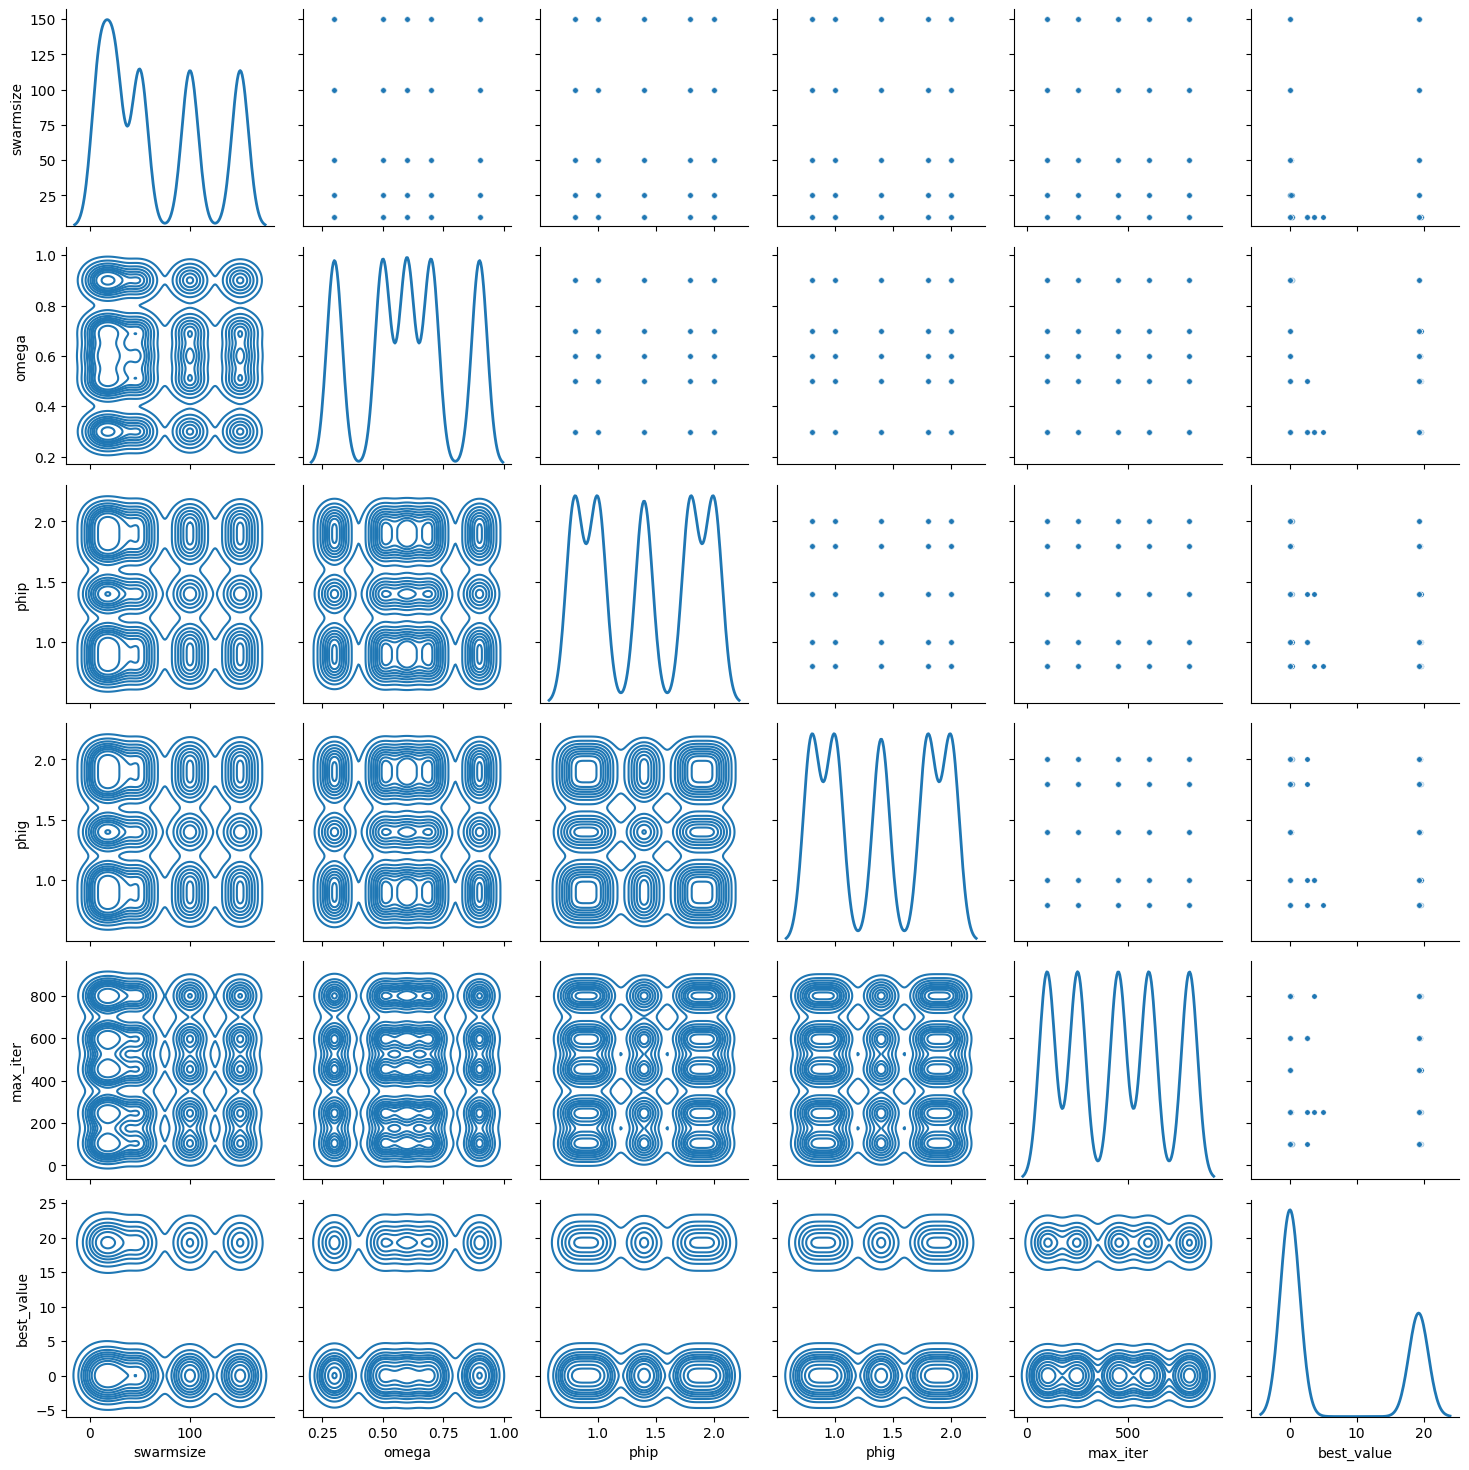

In [6]:
g = sns.PairGrid(df, diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

Computing and visualizing the correlation matrix for numerical variables (excluding best_position and function) using a heatmap. The upper triangle is masked to avoid redundancy.

<Axes: >

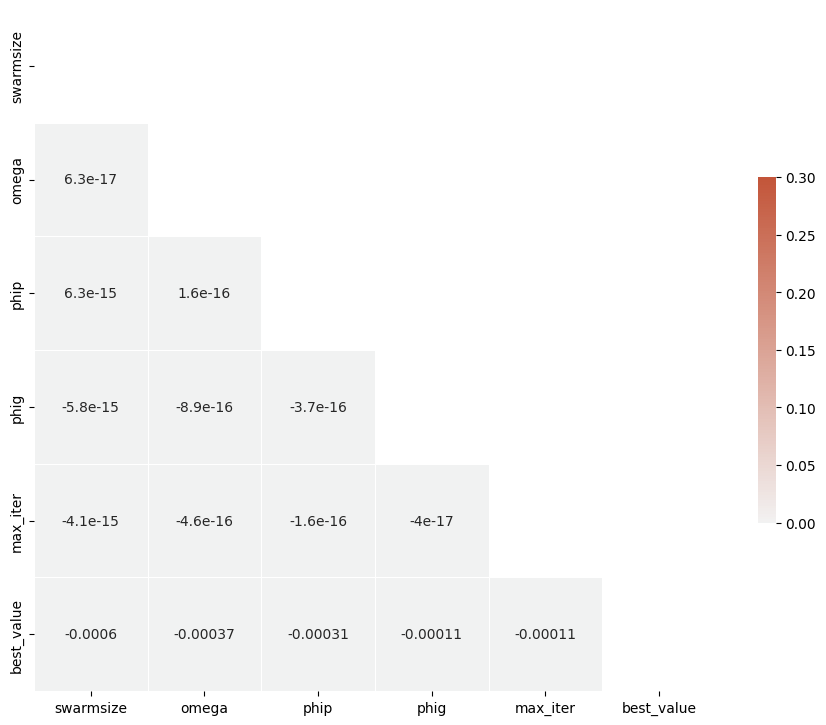

In [8]:
# Compute the correlation matrix
corr = df.loc[:, ~df.columns.isin(['best_position', 'function'])].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [9]:
corr.loc['best_value']

swarmsize    -0.000600
omega        -0.000367
phip         -0.000315
phig         -0.000115
max_iter     -0.000113
best_value    1.000000
Name: best_value, dtype: float64

We can see that there is no correlation between any parameter

 Creating a scatter plot to visualize the relationship between best_value and phig. The color represents the value of best_value.

(0.5, 2.5)

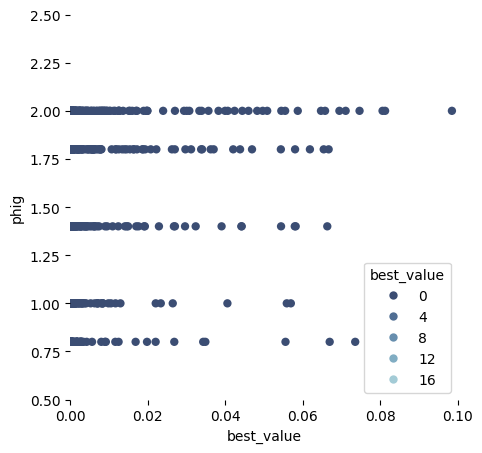

In [ ]:
# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(5, 5))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="best_value", y="phig",
                hue="best_value", 
                #size="depth",
                palette="ch:r=-.2,d=.3_r",
                #hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=df[['phig', 'best_value']], ax=ax)

ax.set_xlim(0, 0.1)  
ax.set_ylim(0.5, 2.5)  

 Creating a joint plot to visualize the relationship between phip and best_value, with scatter plots in the center and marginal distributions (rug plots) on the axes.

c:\Users\esteb\Desktop\CUNEF\2024-2025\Segundo cuatri\Programación Paralela\Entrega1 copy\practicaPSO\Lib\site-packages\seaborn\axisgrid.py:1766: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  f.tight_layout()


(0.0, 0.1)

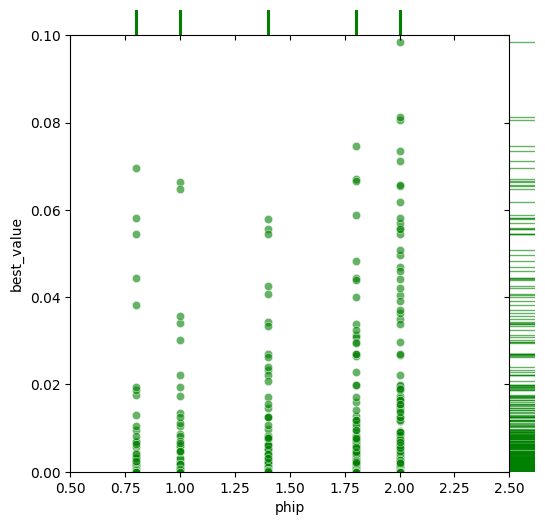

In [ ]:
g = sns.JointGrid(data=df[['phip', 'best_value']], x="phip", y="best_value", space=0, ratio=17)
g.plot_joint(sns.scatterplot, #size=mpg["horsepower"], 
             sizes=(30, 120),
             color="g", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)

g.ax_joint.set_xlim(0.5, 2.5)  
g.ax_joint.set_ylim(0, 0.1)  

Setting the display format for floating-point numbers to scientific notation for better readability of very large or small values.

In [16]:
pd.options.display.float_format = '{:.10e}'.format


Counting the number of rows where best_value equals 0. 

In [18]:
(df['best_value'] == 0).sum()


np.int64(45)

Filtering and display rows where best_value equals 0, showing the corresponding function, best position, and best value.

In [ ]:
df[df['best_value'] == 0][['function', 'best_position', 'best_value']]


Next we are going to group the data by different parameters (phip, phig, swarmsize, omega, max_iter) and find the minimum best_value for each group. This identifies the optimal values for each parameter.

## c1 Parameter

In [17]:
df.groupby('phip').min()['best_value']

phip
8.0000000000e-01   0.0000000000e+00
1.0000000000e+00   0.0000000000e+00
1.4000000000e+00   0.0000000000e+00
1.8000000000e+00   0.0000000000e+00
2.0000000000e+00   0.0000000000e+00
Name: best_value, dtype: float64

The analysis of the c1 parameter (phip) shows that for all tested values (0.8, 1.0, 1.4, 1.8, and 2.0), the best_value achieved is consistently 0.0. This indicates that the optimization process is robust across these values of phip, as it consistently finds the optimal solution regardless of the specific value of phip within this range.

## c2 Parameter

In [21]:
df.groupby('phig').min()['best_value']

phig
8.0000000000e-01    0.0000000000e+00
1.0000000000e+00    0.0000000000e+00
1.4000000000e+00    0.0000000000e+00
1.8000000000e+00   2.4611880148e-319
2.0000000000e+00   1.8516925252e-304
Name: best_value, dtype: float64

The analysis of the c2 parameter (phig) shows that for most tested values (0.8, 1.0, and 1.4), the best_value achieved is consistently 0.0. However, for phig values of 1.8 and 2.0, the best_value is extremely small but not exactly zero (2.46e-319 and 1.85e-304, respectively). This indicates that the optimization process is highly effective across all tested values of phig, but slightly less robust for higher values, where the algorithm converges to near-optimal solutions instead of the exact optimum.

## Swarmsize

In [23]:
df.groupby('swarmsize').min()['best_value']

swarmsize
10    6.5132754567e-309
25     0.0000000000e+00
50     0.0000000000e+00
100    0.0000000000e+00
150    0.0000000000e+00
Name: best_value, dtype: float64

The analysis of the swarmsize parameter shows that for most tested values (25, 50, 100, and 150), the best_value achieved is consistently 0.0. However, for a swarmsize of 10, the best_value is extremely small but not exactly zero (6.51e-309). This indicates that the optimization process is highly effective for larger swarm sizes, where the algorithm consistently finds the optimal solution. 

## Omega

In [24]:
df.groupby('omega').min()['best_value']

omega
3.0000000000e-01    0.0000000000e+00
5.0000000000e-01   2.0305621142e-237
6.0000000000e-01   4.8022484788e-175
7.0000000000e-01   2.7414011249e-121
9.0000000000e-01    3.4223639884e-31
Name: best_value, dtype: float64

The analysis of the omega parameter shows that for an omega value of 0.3, the best_value achieved is consistently 0.0. However, for higher values of omega (0.5, 0.6, 0.7, and 0.9), the best_value is extremely small but not exactly zero. This indicates that the optimization process is most effective at lower values of omega, where it consistently finds the exact optimal solution. 

## Maximum iteration number

In [26]:
df.groupby('max_iter').min()['best_value']

max_iter
100    1.4821467247e-51
250   1.0043043088e-121
450   1.1112984633e-217
600   1.0439116057e-289
800    0.0000000000e+00
Name: best_value, dtype: float64

The analysis of the max_iter parameter shows that for a max_iter value of 800, the best_value achieved is consistently 0.0. However, for lower values of max_iter (100, 250, 450, and 600), the best_value is extremely small but not exactly zero. This indicates that the optimization process benefits from higher iteration limits, as it consistently finds the exact optimal solution when max_iter is sufficiently large.

## Best solution

### Best scenario

In [28]:
df[df['best_value']==df['best_value'].min()].sort_values('best_value', ascending=True)

,function,swarmsize,omega,phip,phig,max_iter,best_position,best_value
1887,<function quadratic_function at 0x000001CE937D...,25,3.0000000000e-01,8.0000000000e-01,8.0000000000e-01,800,[-3.57619803e-163 -1.31256737e-162],0.0000000000e+00
1902,<function quadratic_function at 0x000001CE937D...,25,3.0000000000e-01,8.0000000000e-01,1.0000000000e+00,800,[-7.98041568e-163 -1.54749340e-162],0.0000000000e+00
1917,<function quadratic_function at 0x000001CE937D...,25,3.0000000000e-01,8.0000000000e-01,1.4000000000e+00,800,[4.85060239e-163 1.23967140e-162],0.0000000000e+00
1962,<function quadratic_function at 0x000001CE937D...,25,3.0000000000e-01,1.0000000000e+00,8.0000000000e-01,800,[-8.64568465e-163 5.92459326e-163],0.0000000000e+00
1977,<function quadratic_function at 0x000001CE937D...,25,3.0000000000e-01,1.0000000000e+00,1.0000000000e+00,800,[-3.81014733e-163 1.20477175e-162],0.0000000000e+00
1992,<function quadratic_function at 0x000001CE937D...,25,3.0000000000e-01,1.0000000000e+00,1.4000000000e+00,800,[-1.32510867e-162 -1.51960681e-162],0.0000000000e+00
2037,<function quadratic_function at 0x000001CE937D...,25,3.0000000000e-01,1.4000000000e+00,8.0000000000e-01,800,[-1.50592174e-163 -2.04110140e-163],0.0000000000e+00
2052,<function quadratic_function at 0x000001CE937D...,25,3.0000000000e-01,1.4000000000e+00,1.0000000000e+00,800,[-1.09238276e-162 -9.37859973e-163],0.0000000000e+00
2112,<function quadratic_function at 0x000001CE937D...,25,3.0000000000e-01,1.8000000000e+00,8.0000000000e-01,800,[-6.19223437e-163 1.04603739e-162],0.0000000000e+00
2187,<function quadratic_function at 0x000001CE937D...,25,3.0000000000e-01,2.0000000000e+00,8.0000000000e-01,800,[-1.55087218e-162 1.64891974e-163],0.0000000000e+00


The results from the "Best scenario" analysis demonstrate that the optimization process consistently achieves the optimal solution (best_value = 0.0) under various configurations of parameters.

In [34]:
df[(df.function=='<function quadratic_function at 0x000001CE937D2C00>')].sort_values('best_value', ascending=True).iloc[1,:]

function         <function quadratic_function at 0x000001CE937D...
swarmsize                                                       50
omega                                             3.0000000000e-01
phip                                              8.0000000000e-01
phig                                              8.0000000000e-01
max_iter                                                       800
best_position                  [ 7.69730799e-163 -1.08159791e-162]
best_value                                        0.0000000000e+00
Name: 3762, dtype: object

This highlights the effectiveness of the optimization process when applied to the quadratic function under these parameter settings.

In [35]:
df[(df.function=='<function ackley_function at 0x000001CE960AE520>')].sort_values('best_value', ascending=True).iloc[1,:]

function         <function ackley_function at 0x000001CE960AE520>
swarmsize                                                     100
omega                                            6.0000000000e-01
phip                                             1.0000000000e+00
phig                                             8.0000000000e-01
max_iter                                                      800
best_position                   [-1.62178358e-16 -1.71631838e-16]
best_value                                       4.4408920985e-16
Name: 6464, dtype: object

This result corresponds to the Ackley function, where the algorithm achieves a near-optimal solution with a best_value of 4.44e-16. This demonstrates the effectiveness of the optimization process for the Ackley function, although it doesn't reach the effectiveness of the quadratic function.

In [36]:
df[(df.function=='<function rastrigin_function at 0x000001CE960AE480>')].sort_values('best_value', ascending=True).iloc[1,:]

function         <function rastrigin_function at 0x000001CE960A...
swarmsize                                                      150
omega                                             9.0000000000e-01
phip                                              1.0000000000e+00
phig                                              1.0000000000e+00
max_iter                                                       450
best_position                    [-1.29492115e-09 -9.30101391e-09]
best_value                                        1.9259259259e+01
Name: 9097, dtype: object

This result corresponds to the Rastrigin function, where the algorithm achieves a best_value of 19.259259259.The result is quite less optimal than the ones of the quadratic or Ackley functions.

### Top 10 solutions


Now we are going to see the top ten solutions for each function:

In [37]:
df[df.function=='<function quadratic_function at 0x000001CE937D2C00>'].sort_values('best_value', ascending=True).iloc[:10,:]

,function,swarmsize,omega,phip,phig,max_iter,best_position,best_value
7752,<function quadratic_function at 0x000001CE937D...,150,3.0000000000e-01,1.8000000000e+00,1.0000000000e+00,800,[1.00288019e-162 1.91921789e-163],0.0000000000e+00
3762,<function quadratic_function at 0x000001CE937D...,50,3.0000000000e-01,8.0000000000e-01,8.0000000000e-01,800,[ 7.69730799e-163 -1.08159791e-162],0.0000000000e+00
3777,<function quadratic_function at 0x000001CE937D...,50,3.0000000000e-01,8.0000000000e-01,1.0000000000e+00,800,[-1.25608696e-162 -5.30740016e-163],0.0000000000e+00
7737,<function quadratic_function at 0x000001CE937D...,150,3.0000000000e-01,1.8000000000e+00,8.0000000000e-01,800,[-6.19974379e-163 1.44750228e-162],0.0000000000e+00
1902,<function quadratic_function at 0x000001CE937D...,25,3.0000000000e-01,8.0000000000e-01,1.0000000000e+00,800,[-7.98041568e-163 -1.54749340e-162],0.0000000000e+00
1992,<function quadratic_function at 0x000001CE937D...,25,3.0000000000e-01,1.0000000000e+00,1.4000000000e+00,800,[-1.32510867e-162 -1.51960681e-162],0.0000000000e+00
1977,<function quadratic_function at 0x000001CE937D...,25,3.0000000000e-01,1.0000000000e+00,1.0000000000e+00,800,[-3.81014733e-163 1.20477175e-162],0.0000000000e+00
1962,<function quadratic_function at 0x000001CE937D...,25,3.0000000000e-01,1.0000000000e+00,8.0000000000e-01,800,[-8.64568465e-163 5.92459326e-163],0.0000000000e+00
2037,<function quadratic_function at 0x000001CE937D...,25,3.0000000000e-01,1.4000000000e+00,8.0000000000e-01,800,[-1.50592174e-163 -2.04110140e-163],0.0000000000e+00
1917,<function quadratic_function at 0x000001CE937D...,25,3.0000000000e-01,8.0000000000e-01,1.4000000000e+00,800,[4.85060239e-163 1.23967140e-162],0.0000000000e+00


In [38]:
df[df.function=='<function ackley_function at 0x000001CE960AE520>'].sort_values('best_value', ascending=True).iloc[:10,:]

,function,swarmsize,omega,phip,phig,max_iter,best_position,best_value
71,<function ackley_function at 0x000001CE960AE520>,10,3.0000000000e-01,8.0000000000e-01,2.0000000000e+00,600,[7.78754550e-17 2.69681603e-16],4.4408920985e-16
6464,<function ackley_function at 0x000001CE960AE520>,100,6.0000000000e-01,1.0000000000e+00,8.0000000000e-01,800,[-1.62178358e-16 -1.71631838e-16],4.4408920985e-16
6470,<function ackley_function at 0x000001CE960AE520>,100,6.0000000000e-01,1.0000000000e+00,1.0000000000e+00,250,[ 1.91199852e-16 -7.41483641e-17],4.4408920985e-16
191,<function ackley_function at 0x000001CE960AE520>,10,3.0000000000e-01,1.4000000000e+00,1.4000000000e+00,600,[5.17729657e-17 1.96043078e-16],4.4408920985e-16
194,<function ackley_function at 0x000001CE960AE520>,10,3.0000000000e-01,1.4000000000e+00,1.4000000000e+00,800,[-2.59664957e-16 -1.01912343e-16],4.4408920985e-16
6473,<function ackley_function at 0x000001CE960AE520>,100,6.0000000000e-01,1.0000000000e+00,1.0000000000e+00,450,[-1.11484925e-16 -3.17756613e-16],4.4408920985e-16
6476,<function ackley_function at 0x000001CE960AE520>,100,6.0000000000e-01,1.0000000000e+00,1.0000000000e+00,600,[-1.28857371e-17 2.02369507e-16],4.4408920985e-16
6623,<function ackley_function at 0x000001CE960AE520>,100,6.0000000000e-01,1.8000000000e+00,1.0000000000e+00,450,[-1.37268809e-16 -3.27364613e-16],4.4408920985e-16
152,<function ackley_function at 0x000001CE960AE520>,10,3.0000000000e-01,1.4000000000e+00,8.0000000000e-01,100,[1.06105328e-16 3.58146425e-16],4.4408920985e-16
155,<function ackley_function at 0x000001CE960AE520>,10,3.0000000000e-01,1.4000000000e+00,8.0000000000e-01,250,[ 8.91604173e-17 -1.86808352e-16],4.4408920985e-16


Next we are going to see the best ten values found for each function:

In [39]:
df[df.function=='<function rastrigin_function at 0x000001CE960AE480>'].sort_values('best_value', ascending=True).iloc[:10,:]

,function,swarmsize,omega,phip,phig,max_iter,best_position,best_value
814,<function rastrigin_function at 0x000001CE960A...,10,6.0000000000e-01,8.0000000000e-01,2.0000000000e+00,250,[-9.92585206e-09 -1.10606579e-08],1.9259259259e+01
9097,<function rastrigin_function at 0x000001CE960A...,150,9.0000000000e-01,1.0000000000e+00,1.0000000000e+00,450,[-1.29492115e-09 -9.30101391e-09],1.9259259259e+01
9100,<function rastrigin_function at 0x000001CE960A...,150,9.0000000000e-01,1.0000000000e+00,1.0000000000e+00,600,[1.21208358e-08 1.11319128e-08],1.9259259259e+01
9103,<function rastrigin_function at 0x000001CE960A...,150,9.0000000000e-01,1.0000000000e+00,1.0000000000e+00,800,[-1.46540366e-08 4.04415303e-09],1.9259259259e+01
6520,<function rastrigin_function at 0x000001CE960A...,100,6.0000000000e-01,1.0000000000e+00,2.0000000000e+00,600,[-1.65160092e-09 -9.53312831e-09],1.9259259259e+01
6523,<function rastrigin_function at 0x000001CE960A...,100,6.0000000000e-01,1.0000000000e+00,2.0000000000e+00,800,[ 1.58519971e-08 -4.73224656e-09],1.9259259259e+01
9118,<function rastrigin_function at 0x000001CE960A...,150,9.0000000000e-01,1.0000000000e+00,1.4000000000e+00,800,[-2.68950033e-09 9.48287232e-09],1.9259259259e+01
8932,<function rastrigin_function at 0x000001CE960A...,150,7.0000000000e-01,2.0000000000e+00,8.0000000000e-01,450,[-5.95935726e-09 -8.86354562e-10],1.9259259259e+01
9028,<function rastrigin_function at 0x000001CE960A...,150,9.0000000000e-01,8.0000000000e-01,1.0000000000e+00,800,[ 3.28267506e-09 -1.44525150e-08],1.9259259259e+01
6526,<function rastrigin_function at 0x000001CE960A...,100,6.0000000000e-01,1.4000000000e+00,8.0000000000e-01,100,[-1.55788924e-08 -5.18190605e-09],1.9259259259e+01


Based on the analysis of the best values achieved for each function, the optimization process demonstrates varying levels of effectiveness depending on the function being optimized. For the quadratic function, the algorithm consistently achieves the optimal solution with a best_value of 0.0 across all tested configurations, showcasing its robustness and efficiency. For the Ackley function, the algorithm achieves near-optimal solutions with a best_value as low as 4.44e-16, indicating high effectiveness but slightly less precision compared to the quadratic function. However, for the Rastrigin function, the algorithm achieves a best_value of 19.259259259, which is significantly less optimal than the results for the other two functions. This suggests that while the optimization process is highly effective for simpler or smoother functions, it faces challenges with more complex, multimodal functions like the Rastrigin function. Overall, the results highlight the strengths and limitations of the optimization process across different types of functions.